# Kafka Consumer for Memory Data

## 2. Consuming data using Kafka
### 2.2. Memory Event Consumer

#### Import libraries

In [1]:
# Import libraries
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from json import loads

#### Define a function to create a real-time plot

* `matplotlib ` is used to create real-time update plots.

In [2]:
# Define the function to plot data
def init_plots():
    try:
        
        # Specify the size of the plot
        width = 9.5
        height = 6
        
        # Create new figure
        fig = plt.figure(figsize=(width,height)) 
        fig.subplots_adjust(hspace=0.6)
        
        # Adding the subplot axes to the figure
        ax = fig.add_subplot(111)
        # Set x and y labels
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Counts')    
        # Set name for the plot
        fig.suptitle('Real-time stream data visualization') # giving figure a title
        
        # Displaying the figure
        fig.show() 
        # Draw the figure on the canvas
        fig.canvas.draw()
        
        # Return figure and axes
        return fig, ax
    
    # If encounters error then print out the error message
    except Exception as ex:
        print(str(ex))

#### Define Kafka functions

* The consumer is created at port 9092 and would consume messages in the specified topic. It would automatically stop if no new messages are found after 10 seconds.

In [3]:
# Define the function to generate Kafka consumer 
def connect_kafka_consumer(topic):
    _consumer = None
    
    # Create the consumer subscribing the to specified topic at port 9092
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=20000, # Stop iteration if no message after 10 seconds
                                   auto_offset_reset='latest', # Start consuming from the latest message
                                   bootstrap_servers=['localhost:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    
    # If encounters error then print out the error message
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    
    # Return the consumer
    finally:
        return _consumer

<br/>

* When messages are consumed, their processing time is extracted together with the data that they contain. The data is split and classifed based on the machine number. The counting of records based on the machine numbers are used to generate a plot together with the processing time. Data used for plotting comes are latest rows that arrive in the last 2 minutes.


* The plot uses its x-axis to represent the timeline and y-axis to represent the count. Each line stands for the records of a machine

In [4]:
# Define the function to consume messages
def consume_messages(consumer, fig, ax):
    try:
        # Create list containers for x and y values
        x, y4, y5, y6, y7, y8 = [], [], [], [], [], []
        
        # Start consuming messages
        for message in consumer: 
            
            # Extract the processing time
            timestamp = message.timestamp
            
            # Extract data contained in the message
            message = message.value

            # Add processing time to x
            x.append(timestamp)
            
            # Add the count of records to its corresponding container
            y4.append((len([row for row in message['data'] if row['machine']==4])))
            y5.append((len([row for row in message['data'] if row['machine']==5])))
            y6.append((len([row for row in message['data'] if row['machine']==6])))
            y7.append((len([row for row in message['data'] if row['machine']==7])))
            y8.append((len([row for row in message['data'] if row['machine']==8])))
            

            # Plot records in the last 2 minutes  
            if max(x)-min(x) > 120:
                
                # Plot the data for each machine
                ax.clear()
                ax.plot(x, y4)
                ax.plot(x, y5)
                ax.plot(x, y6)
                ax.plot(x, y7)
                ax.plot(x, y8)
                
                # Set x and y labels 
                ax.set_xlabel('Timestamp')
                ax.set_ylabel('Counts')
                # Set legends
                ax.legend(['Machine 4', 'Machine 5', 'Machine 6', 'Machine 7', 'Machine 8'])
                # Set name for the plot
                ax.set_title('Real-time stream data visualization')

                # Draw the figure on the canvas
                fig.canvas.draw()
            
                # Move the window towards present time
                x.pop(0)
                y4.pop(0)
                y5.pop(0)
                y6.pop(0)
                y7.pop(0)
                y8.pop(0)

        # Close the plot after finish drawing
        plt.close('all')
    
    # If encounters error then print out the error message
    except Exception as ex:
        print(str(ex))

#### Generate the consumer

<IPython.core.display.Javascript object>


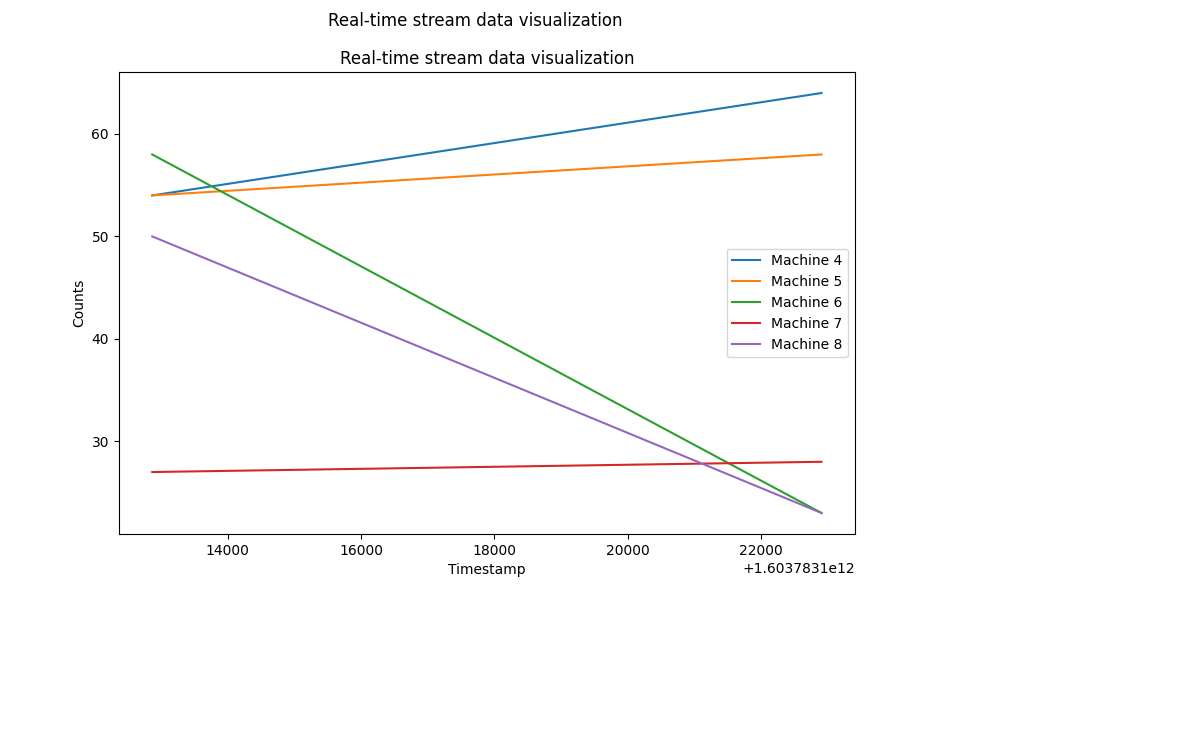

In [5]:
%matplotlib notebook 

# Run the main program
if __name__ == '__main__':
    
    # Create the consumer subscribing to the memory topic
    consumer = connect_kafka_consumer('memory')
    
    # Create the figue and axes
    fig, ax = init_plots()    
    
    # Consume messages and update the plot
    consume_messages(consumer, fig, ax)